# Multiple Linear Regression

Geely Auto - Assignment

# Importing all the required modules

In [50]:
import pandas as pd 
import numpy as np
import matplotlib as mtb
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split


# Reading the data

In [29]:
df=pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# EDA

In [30]:
g=[]
h=[]
for i in df['CarName'].str.split(" ").values.tolist():
    g.append(i[0])
    if len(i)==1:
        h.append("")
    elif len(i)==2:
        h.append(i[1])
    elif len(i)==3:
        h.append(i[1]+" "+i[2])
    elif len(i)==4:
        h.append(i[1]+" "+i[2]+" "+i[3])
    elif len(i)==5:
        h.append(i[1]+" "+i[2]+" "+i[3]+" "+i[4])
df['car_company']=pd.Series(g)
df['car_model']=pd.Series(h)
df=df.drop(["car_ID","CarName"],1)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,car_model
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


<Figure size 2160x1440 with 0 Axes>

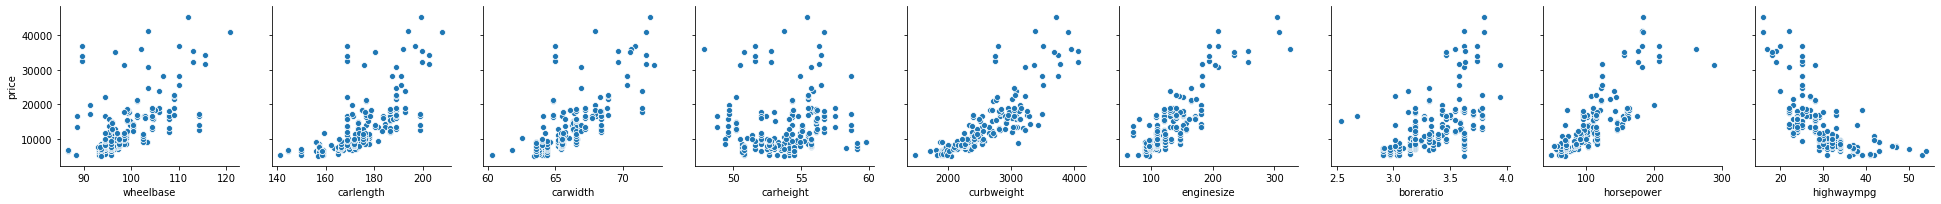

In [31]:
plt.figure(figsize=(30,20))
sns.pairplot(df,y_vars='price',x_vars=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','horsepower','highwaympg'],height =3)
plt.show()

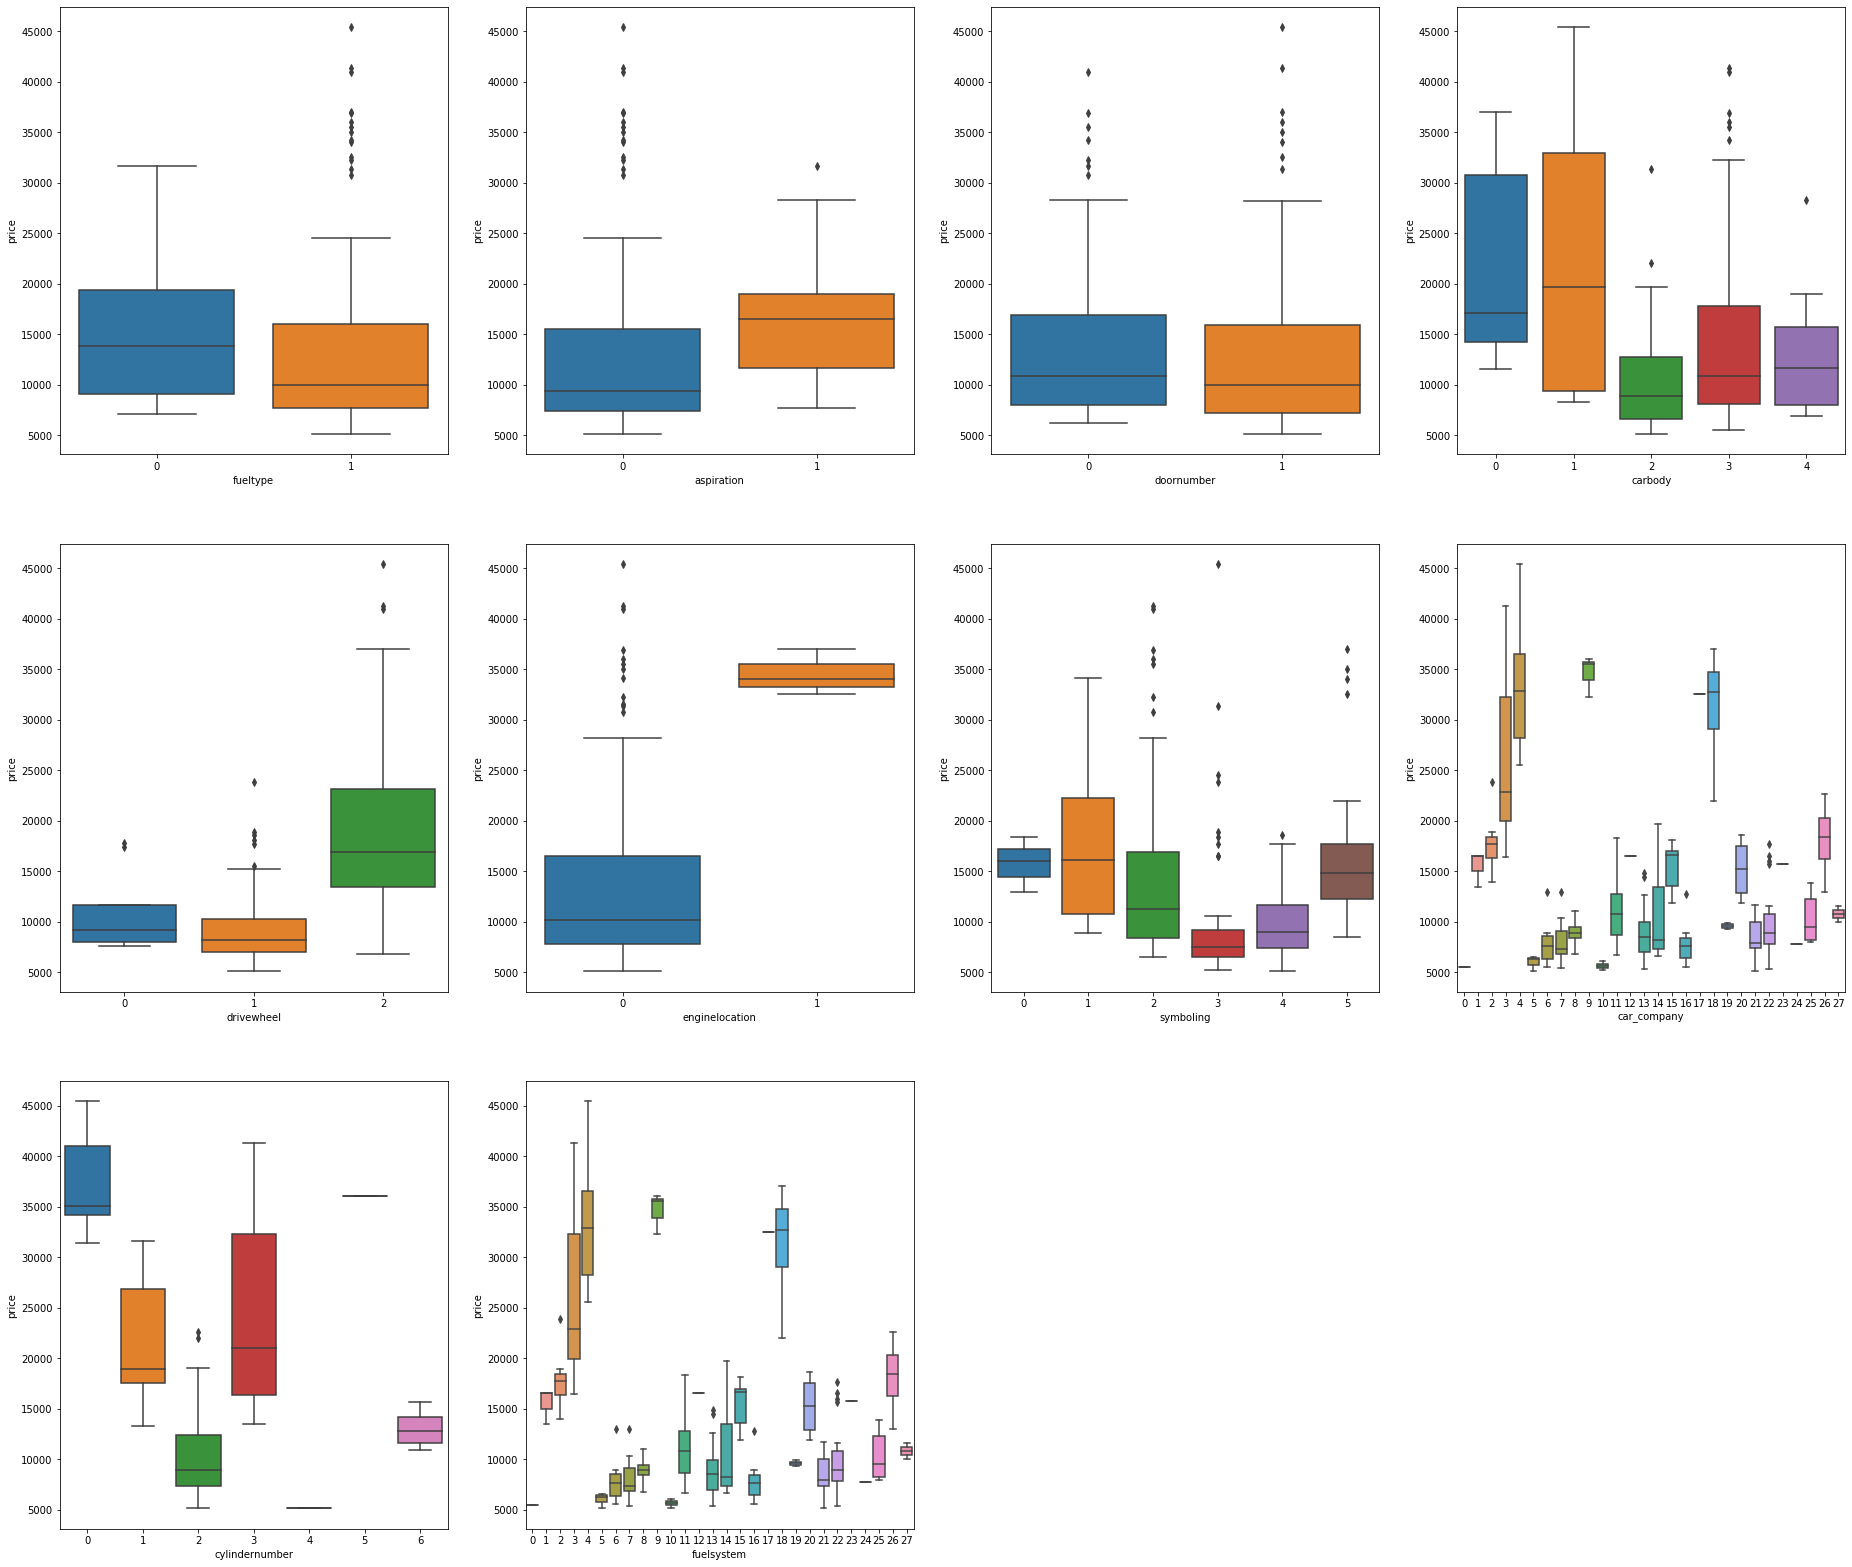

In [149]:
plt.figure(figsize=(32, 28))
plt.subplot(3,4,1)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,4,2)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,4,3)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,4,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,4,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,4,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,4,7)
sns.boxplot(x = 'symboling', y = 'price', data = df)
plt.subplot(3,4,8)
sns.boxplot(x = 'car_company', y = 'price', data = df)
plt.subplot(3,4,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(3,4,10)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.show()

# Getting Dummy Variables

In [34]:
le = preprocessing.LabelEncoder()
list1=["fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","symboling","cylindernumber","car_company"]
for i in list1:
    df[i]=le.fit_transform(df[i])
df=df.drop('car_model',axis=1)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,5,1,0,1,0,2,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,5,1,0,1,0,2,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,3,1,0,1,2,2,0,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,4,1,0,0,3,1,0,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,2
4,4,1,0,0,3,0,0,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,2


In [ ]:
np.random.seed(0)
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

In [70]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,car_company
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.909091,0.181818,0.440559,0.666084,0.646853,0.006993,0.411141,0.525476,0.461655,...,0.241351,0.517742,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.517742
std,0.239200,0.288490,0.387050,0.498199,0.209678,0.283540,0.083624,0.205581,0.204848,0.184517,...,0.154619,0.276478,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.276478
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.272414,0.399187,0.304167,...,0.135849,0.259259,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.259259
50%,0.600000,1.000000,0.000000,0.000000,0.750000,0.500000,0.000000,0.341379,0.502439,0.425000,...,0.184906,0.518519,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.518519
75%,0.600000,1.000000,0.000000,1.000000,0.750000,1.000000,0.000000,0.503448,0.669919,0.550000,...,0.301887,0.777778,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,0.777778
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
df_test.describe()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.887097,0.177419,0.435484,0.625000,0.701613,0.032258,0.437764,0.559481,0.480376,...,0.577658,0.556580,0.544314,0.209375,0.248858,0.393351,0.328405,0.363993,0.239439,0.577658
std,0.271724,0.319058,0.385142,0.499868,0.225205,0.263328,0.178127,0.212861,0.189947,0.165440,...,0.276872,0.228484,0.160738,0.273690,0.163376,0.192092,0.172009,0.181845,0.233076,0.276872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,...,0.074074,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.027778,-0.027027,0.007763,0.074074
25%,0.400000,1.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.313793,0.459350,0.358333,...,0.407407,0.404762,0.484848,0.093750,0.107292,0.265306,0.166667,0.216216,0.092342,0.407407
50%,0.600000,1.000000,0.000000,0.000000,0.750000,0.500000,0.000000,0.387931,0.547967,0.441667,...,0.574074,0.563492,0.585859,0.125000,0.218750,0.346939,0.305556,0.351351,0.158991,0.574074
75%,0.800000,1.000000,0.000000,1.000000,0.750000,1.000000,0.000000,0.570690,0.719919,0.516667,...,0.814815,0.746032,0.641414,0.150000,0.295833,0.540816,0.444444,0.459459,0.317243,0.814815
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,...,0.962963,0.888889,0.863636,1.000000,0.662500,1.000000,0.694444,0.810811,1.112855,0.962963


# Scaling the Sample test and train sets

In [61]:
scaler=pp.MinMaxScaler()
for i in df_train.columns:
    scaler.fit(df_train[i].values.reshape(-1,1))
    df_train[i]=scaler.transform(df_train[i].values.reshape(-1,1))
    df_test[i]=scaler.transform(df_test[i].values.reshape(-1,1))

A:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
A:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
A:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#in

A:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
A:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
A:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#in

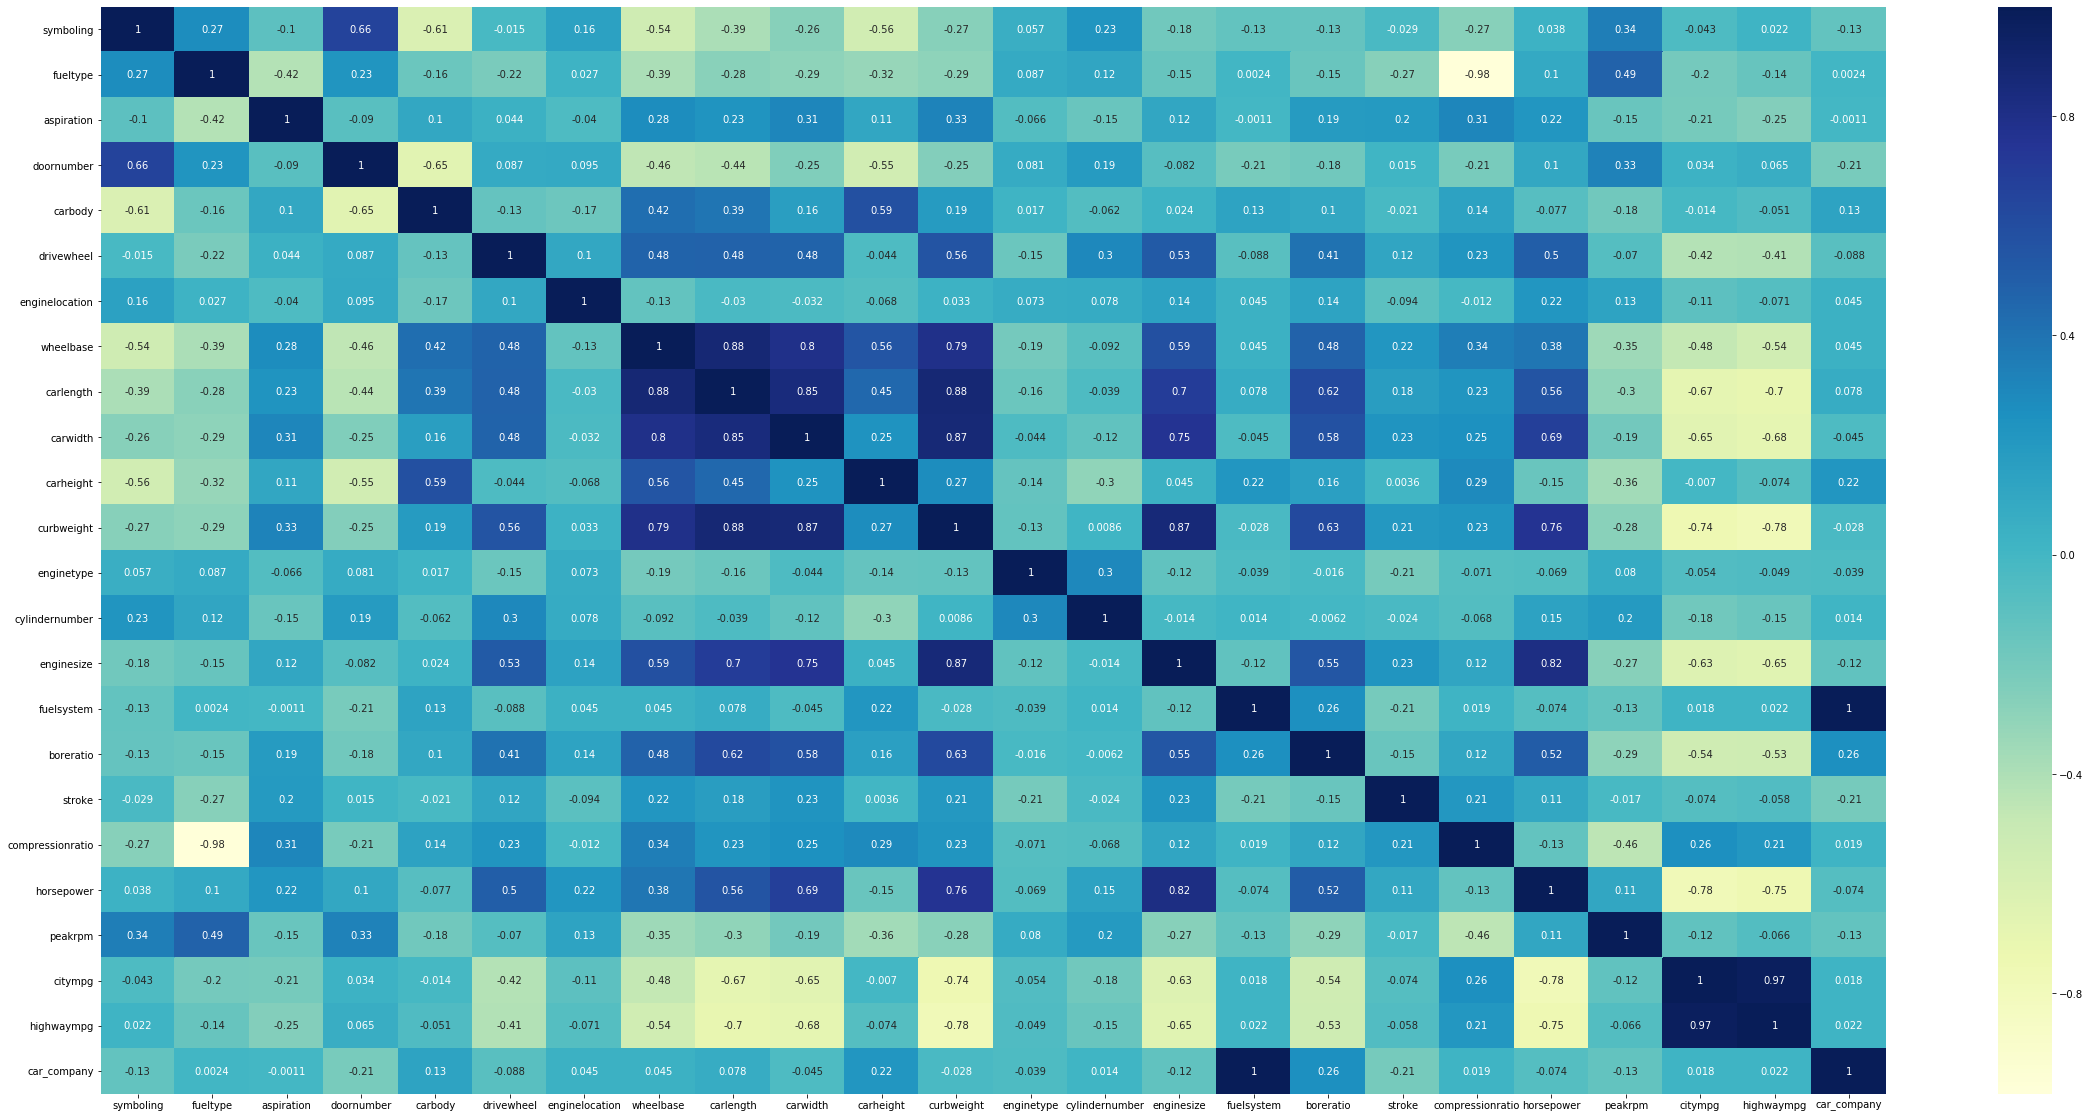

In [151]:
plt.figure(figsize=(40,20))
sns.heatmap(df_train.corr(),annot =True,cmap="YlGnBu")
plt.show()

# Model Building

In [67]:
y_train=df_train.pop('price')
X_train_m1=df_train['enginesize']

In [68]:
import statsmodels.api as sm

X_train_m1_lr=sm.add_constant(X_train_m1)
lr_m1 = sm.OLS(y_train,X_train_m1_lr).fit()
lr_m1.summary()

A:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.09e-44
Time:                        14:02:54   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.000      -0.106      -0.040
enginesize     1.2107      0.058     20.748      0.000       1.095       1.326
==============================================================================
Omnibus:                       23.257   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.410
Skew:                           0.885   Prob(JB):                     9.17e-08
Kurtosis:                       4.520   Cond. No.                         6.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
X_train_m2=df_train
X_train_m2_lr=sm.add_constant(X_train_m2)
lr_m2 = sm.OLS(y_train,X_train_m2_lr).fit()
lr_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     39.86
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.27e-45
Time:                        14:06:47   Log-Likelihood:                 171.65
No. Observations:                 143   AIC:                            -295.3
Df Residuals:                     119   BIC:                            -224.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2294      0.294     -0.780      0.437      -0.812       0.353
symboling            0.0287      0.048      0.596      0.553      -0.067       0.124
fueltype             0.0768      0.247      0.311      0.756      -0.412       0.565
aspiration           0.0131      0.031      0.425      0.672      -0.048       0.074
doornumber          -0.0128      0.022     -0.571      0.569      -0.057       0.032
carbody             -0.0698      0.054     -1.294      0.198      -0.177       0.037
drivewheel           0.0533      0.038      1.399      0.165      -0.022       0.129
enginelocation       0.3188      0.094      3.389      0.001       0.133       0.505
wheelbase            0.0790      0.110      0.716      0.476      -0.140       0.298
carlength           -0.0482      0.117     -0.413      0.681      -0.279       0.183
carwidth             0.2184      0.124      1.761      0.081      -0.027       0.464
carheight            0.0857      0.055      1.572      0.119      -0.022       0.194
curbweight           0.2702      0.145      1.859      0.066      -0.018       0.558
enginetype           0.0305      0.048      0.629      0.531      -0.065       0.126
cylindernumber       0.0386      0.072      0.540      0.590      -0.103       0.180
enginesize           0.4793      0.160      3.005      0.003       0.163       0.795
fuelsystem          -0.0634      0.015     -4.342      0.000      -0.092      -0.034
boreratio           -0.0184      0.054     -0.344      0.731      -0.124       0.088
stroke              -0.1116      0.061     -1.836      0.069      -0.232       0.009
compressionratio     0.1182      0.284      0.417      0.678      -0.444       0.680
horsepower           0.2049      0.151      1.354      0.178      -0.095       0.505
peakrpm              0.0539      0.055      0.973      0.333      -0.056       0.164
citympg             -0.0796      0.209     -0.381      0.704      -0.493       0.334
highwaympg           0.1077      0.197      0.547      0.585      -0.282       0.497
car_company         -0.0634      0.015     -4.342      0.000      -0.092      -0.034
==============================================================================
Omnibus:                       41.982   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.655
Skew:                           0.894   Prob(JB):                     1.81e-46
Kurtosis:                       8.671   Cond. No.                     2.29e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.75e-32. This might indicate that there are
strong multicollinearity problems or that the desi

# Checking VIF

And then, drop the variables one by one until the model is consistent.

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_m2.columns
vif['VIF'] = [variance_inflation_factor(X_train_m2.values, i) for i in range(X_train_m2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

A:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
23,car_company,inf
15,fuelsystem,inf
1,fueltype,157.91
22,highwaympg,152.48
21,citympg,149.39
8,carlength,97.14
11,curbweight,93.99
9,carwidth,79.23
7,wheelbase,54.99
14,enginesize,45.81


In [76]:
X_train_m3 = X_train_m2.drop(['car_company'],1)
X_train_m3_lr = sm.add_constant(X_train_m3)
lr_m3 = sm.OLS(y_train,X_train_m3_lr).fit()
lr_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     39.86
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.27e-45
Time:                        14:13:26   Log-Likelihood:                 171.65
No. Observations:                 143   AIC:                            -295.3
Df Residuals:                     119   BIC:                            -224.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2294      0.294     -0.780      0.437      -0.812       0.353
symboling            0.0287      0.048      0.596      0.553      -0.067       0.124
fueltype             0.0768      0.247      0.311      0.756      -0.412       0.565
aspiration           0.0131      0.031      0.425      0.672      -0.048       0.074
doornumber          -0.0128      0.022     -0.571      0.569      -0.057       0.032
carbody             -0.0698      0.054     -1.294      0.198      -0.177       0.037
drivewheel           0.0533      0.038      1.399      0.165      -0.022       0.129
enginelocation       0.3188      0.094      3.389      0.001       0.133       0.505
wheelbase            0.0790      0.110      0.716      0.476      -0.140       0.298
carlength           -0.0482      0.117     -0.413      0.681      -0.279       0.183
carwidth             0.2184      0.124      1.761      0.081      -0.027       0.464
carheight            0.0857      0.055      1.572      0.119      -0.022       0.194
curbweight           0.2702      0.145      1.859      0.066      -0.018       0.558
enginetype           0.0305      0.048      0.629      0.531      -0.065       0.126
cylindernumber       0.0386      0.072      0.540      0.590      -0.103       0.180
enginesize           0.4793      0.160      3.005      0.003       0.163       0.795
fuelsystem          -0.1267      0.029     -4.342      0.000      -0.185      -0.069
boreratio           -0.0184      0.054     -0.344      0.731      -0.124       0.088
stroke              -0.1116      0.061     -1.836      0.069      -0.232       0.009
compressionratio     0.1182      0.284      0.417      0.678      -0.444       0.680
horsepower           0.2049      0.151      1.354      0.178      -0.095       0.505
peakrpm              0.0539      0.055      0.973      0.333      -0.056       0.164
citympg             -0.0796      0.209     -0.381      0.704      -0.493       0.334
highwaympg           0.1077      0.197      0.547      0.585      -0.282       0.497
==============================================================================
Omnibus:                       41.982   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.655
Skew:                           0.894   Prob(JB):                     1.81e-46
Kurtosis:                       8.671   Cond. No.                         175.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train_m3.columns
vif['VIF'] = [variance_inflation_factor(X_train_m3.values, i) for i in range(X_train_m3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,fueltype,157.91
22,highwaympg,152.48
21,citympg,149.39
8,carlength,97.14
11,curbweight,93.99
9,carwidth,79.23
7,wheelbase,54.99
14,enginesize,45.81
19,horsepower,40.49
18,compressionratio,32.71


In [84]:
X_train_m4 = X_train_m3.drop(['fueltype'],1)
X_train_m4_lr = sm.add_constant(X_train_m4)
lr_m4 = sm.OLS(y_train,X_train_m4_lr).fit()
lr_m4.summary()

A:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     41.98
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.22e-46
Time:                        14:21:45   Log-Likelihood:                 171.59
No. Observations:                 143   AIC:                            -297.2
Df Residuals:                     120   BIC:                            -229.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1439      0.105     -1.376      0.171      -0.351       0.063
symboling            0.0264      0.047      0.556      0.579      -0.068       0.120
aspiration           0.0078      0.026      0.305      0.761      -0.043       0.059
doornumber          -0.0127      0.022     -0.566      0.572      -0.057       0.032
carbody             -0.0689      0.054     -1.284      0.202      -0.175       0.037
drivewheel           0.0547      0.038      1.452      0.149      -0.020       0.129
enginelocation       0.3180      0.094      3.394      0.001       0.133       0.503
wheelbase            0.0709      0.107      0.663      0.508      -0.141       0.282
carlength           -0.0454      0.116     -0.391      0.696      -0.275       0.184
carwidth             0.2287      0.119      1.921      0.057      -0.007       0.464
carheight            0.0854      0.054      1.573      0.118      -0.022       0.193
curbweight           0.2621      0.142      1.839      0.068      -0.020       0.544
enginetype           0.0285      0.048      0.596      0.552      -0.066       0.123
cylindernumber       0.0456      0.068      0.675      0.501      -0.088       0.180
enginesize           0.4874      0.157      3.109      0.002       0.177       0.798
fuelsystem          -0.1243      0.028     -4.434      0.000      -0.180      -0.069
boreratio           -0.0224      0.052     -0.433      0.665      -0.125       0.080
stroke              -0.1194      0.055     -2.166      0.032      -0.229      -0.010
compressionratio     0.0312      0.048      0.645      0.520      -0.065       0.127
horsepower           0.2060      0.151      1.367      0.174      -0.092       0.504
peakrpm              0.0579      0.054      1.078      0.283      -0.048       0.164
citympg             -0.0750      0.207     -0.362      0.718      -0.486       0.336
highwaympg           0.1080      0.196      0.551      0.583      -0.280       0.496
==============================================================================
Omnibus:                       39.546   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.114
Skew:                           0.850   Prob(JB):                     3.85e-41
Kurtosis:                       8.324   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
vif = pd.DataFrame()
vif['Features'] = X_train_m4.columns
vif['VIF'] = [variance_inflation_factor(X_train_m4.values, i) for i in range(X_train_m4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,highwaympg,150.35
20,citympg,140.47
10,curbweight,92.29
7,carlength,91.50
8,carwidth,78.94
6,wheelbase,54.42
13,enginesize,45.50
18,horsepower,40.44
3,carbody,31.19
16,stroke,20.12


In [86]:
X_train_m5 = X_train_m4.drop(['highwaympg'],1)
X_train_m5_lr = sm.add_constant(X_train_m5)
lr_m5 = sm.OLS(y_train,X_train_m5_lr).fit()
lr_m5.summary()

A:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     44.22
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           8.97e-47
Time:                        14:22:45   Log-Likelihood:                 171.41
No. Observations:                 143   AIC:                            -298.8
Df Residuals:                     121   BIC:                            -233.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1367      0.103     -1.322      0.189      -0.342       0.068
symboling            0.0285      0.047      0.604      0.547      -0.065       0.122
aspiration           0.0038      0.025      0.156      0.876      -0.045       0.052
doornumber          -0.0144      0.022     -0.654      0.515      -0.058       0.029
carbody             -0.0672      0.053     -1.258      0.211      -0.173       0.039
drivewheel           0.0571      0.037      1.532      0.128      -0.017       0.131
enginelocation       0.3198      0.093      3.425      0.001       0.135       0.505
wheelbase            0.0653      0.106      0.616      0.539      -0.145       0.275
carlength           -0.0405      0.115     -0.351      0.726      -0.269       0.188
carwidth             0.2262      0.119      1.907      0.059      -0.009       0.461
carheight            0.0828      0.054      1.534      0.128      -0.024       0.190
curbweight           0.2472      0.140      1.772      0.079      -0.029       0.523
enginetype           0.0290      0.048      0.607      0.545      -0.066       0.123
cylindernumber       0.0405      0.067      0.606      0.545      -0.092       0.173
enginesize           0.4682      0.152      3.072      0.003       0.166       0.770
fuelsystem          -0.1246      0.028     -4.458      0.000      -0.180      -0.069
boreratio           -0.0188      0.051     -0.368      0.714      -0.120       0.083
stroke              -0.1100      0.052     -2.104      0.037      -0.213      -0.007
compressionratio     0.0346      0.048      0.722      0.472      -0.060       0.129
horsepower           0.2305      0.144      1.605      0.111      -0.054       0.515
peakrpm              0.0531      0.053      1.004      0.317      -0.052       0.158
citympg              0.0254      0.099      0.257      0.798      -0.170       0.221
==============================================================================
Omnibus:                       40.833   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.937
Skew:                           0.883   Prob(JB):                     7.71e-43
Kurtosis:                       8.425   Cond. No.                         73.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train_m5.columns
vif['VIF'] = [variance_inflation_factor(X_train_m5.values, i) for i in range(X_train_m5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,carlength,90.43
10,curbweight,89.69
8,carwidth,78.79
6,wheelbase,53.91
13,enginesize,43.27
18,horsepower,36.78
3,carbody,31.01
9,carheight,19.52
16,stroke,17.61
15,boreratio,16.54


In [88]:
X_train_m6 = X_train_m5.drop(['carlength'],1)
X_train_m6_lr = sm.add_constant(X_train_m6)
lr_m6 = sm.OLS(y_train,X_train_m6_lr).fit()
lr_m6.summary()

A:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     46.76
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.37e-47
Time:                        14:23:36   Log-Likelihood:                 171.34
No. Observations:                 143   AIC:                            -300.7
Df Residuals:                     122   BIC:                            -238.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1455      0.100     -1.455      0.148      -0.344       0.053
symboling            0.0271      0.047      0.579      0.564      -0.066       0.120
aspiration           0.0050      0.024      0.208      0.836      -0.043       0.053
doornumber          -0.0134      0.022     -0.616      0.539      -0.057       0.030
carbody             -0.0728      0.051     -1.435      0.154      -0.173       0.028
drivewheel           0.0565      0.037      1.521      0.131      -0.017       0.130
enginelocation       0.3182      0.093      3.425      0.001       0.134       0.502
wheelbase            0.0564      0.103      0.549      0.584      -0.147       0.260
carwidth             0.2133      0.112      1.897      0.060      -0.009       0.436
carheight            0.0805      0.053      1.509      0.134      -0.025       0.186
curbweight           0.2407      0.138      1.747      0.083      -0.032       0.513
enginetype           0.0331      0.046      0.719      0.474      -0.058       0.124
cylindernumber       0.0385      0.066      0.581      0.562      -0.093       0.170
enginesize           0.4634      0.151      3.064      0.003       0.164       0.763
fuelsystem          -0.1254      0.028     -4.516      0.000      -0.180      -0.070
boreratio           -0.0214      0.051     -0.425      0.672      -0.121       0.079
stroke              -0.1102      0.052     -2.116      0.036      -0.213      -0.007
compressionratio     0.0335      0.048      0.704      0.483      -0.061       0.128
horsepower           0.2386      0.141      1.690      0.094      -0.041       0.518
peakrpm              0.0546      0.053      1.040      0.300      -0.049       0.159
citympg              0.0387      0.091      0.426      0.671      -0.141       0.219
==============================================================================
Omnibus:                       38.711   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.688
Skew:                           0.843   Prob(JB):                     1.17e-38
Kurtosis:                       8.145   Cond. No.                         69.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
vif = pd.DataFrame()
vif['Features'] = X_train_m6.columns
vif['VIF'] = [variance_inflation_factor(X_train_m6.values, i) for i in range(X_train_m6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,curbweight,86.47
7,carwidth,71.32
6,wheelbase,50.81
12,enginesize,42.91
17,horsepower,35.96
3,carbody,27.28
8,carheight,18.95
15,stroke,17.47
14,boreratio,15.84
4,drivewheel,15.34


In [90]:
X_train_m7 = X_train_m6.drop(['curbweight'],1)
X_train_m7_lr = sm.add_constant(X_train_m7)
lr_m7 = sm.OLS(y_train,X_train_m7_lr).fit()
lr_m7.summary()

A:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     48.25
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           8.52e-48
Time:                        14:24:41   Log-Likelihood:                 169.57
No. Observations:                 143   AIC:                            -299.1
Df Residuals:                     123   BIC:                            -239.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1045      0.098     -1.066      0.289      -0.299       0.090
symboling            0.0349      0.047      0.742      0.460      -0.058       0.128
aspiration           0.0156      0.024      0.659      0.511      -0.031       0.062
doornumber          -0.0179      0.022     -0.819      0.414      -0.061       0.025
carbody             -0.0711      0.051     -1.391      0.167      -0.172       0.030
drivewheel           0.0600      0.037      1.606      0.111      -0.014       0.134
enginelocation       0.2951      0.093      3.182      0.002       0.112       0.479
wheelbase            0.0910      0.102      0.896      0.372      -0.110       0.292
carwidth             0.2496      0.111      2.242      0.027       0.029       0.470
carheight            0.1033      0.052      1.979      0.050   -1.52e-05       0.207
enginetype           0.0209      0.046      0.456      0.649      -0.070       0.112
cylindernumber       0.0550      0.066      0.832      0.407      -0.076       0.186
enginesize           0.5992      0.131      4.580      0.000       0.340       0.858
fuelsystem          -0.1270      0.028     -4.538      0.000      -0.182      -0.072
boreratio           -0.0194      0.051     -0.381      0.704      -0.120       0.081
stroke              -0.1198      0.052     -2.295      0.023      -0.223      -0.016
compressionratio     0.0587      0.046      1.283      0.202      -0.032       0.149
horsepower           0.2577      0.142      1.815      0.072      -0.023       0.539
peakrpm              0.0468      0.053      0.888      0.376      -0.058       0.151
citympg             -0.0389      0.080     -0.486      0.628      -0.197       0.120
==============================================================================
Omnibus:                       38.303   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.699
Skew:                           0.868   Prob(JB):                     5.70e-35
Kurtosis:                       7.843   Cond. No.                         65.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
vif = pd.DataFrame()
vif['Features'] = X_train_m7.columns
vif['VIF'] = [variance_inflation_factor(X_train_m7.values, i) for i in range(X_train_m7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,carwidth,68.51
6,wheelbase,48.65
16,horsepower,35.69
11,enginesize,30.71
3,carbody,27.12
14,stroke,17.45
8,carheight,17.13
13,boreratio,15.71
4,drivewheel,15.20
10,cylindernumber,14.86


In [92]:
X_train_m8 = X_train_m7.drop(['carwidth'],1)
X_train_m8_lr = sm.add_constant(X_train_m8)
lr_m8 = sm.OLS(y_train,X_train_m8_lr).fit()
lr_m8.summary()

A:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     49.06
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.34e-47
Time:                        14:25:33   Log-Likelihood:                 166.71
No. Observations:                 143   AIC:                            -295.4
Df Residuals:                     124   BIC:                            -239.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0873      0.099     -0.879      0.381      -0.284       0.109
symboling            0.0608      0.046      1.312      0.192      -0.031       0.152
aspiration           0.0067      0.024      0.281      0.780      -0.040       0.054
doornumber          -0.0275      0.022     -1.265      0.208      -0.071       0.016
carbody             -0.0886      0.051     -1.724      0.087      -0.190       0.013
drivewheel           0.0500      0.038      1.327      0.187      -0.025       0.125
enginelocation       0.2470      0.092      2.694      0.008       0.066       0.428
wheelbase            0.2419      0.077      3.132      0.002       0.089       0.395
carheight            0.0897      0.053      1.703      0.091      -0.015       0.194
enginetype           0.0656      0.042      1.561      0.121      -0.018       0.149
cylindernumber      -0.0112      0.060     -0.187      0.852      -0.130       0.108
enginesize           0.5755      0.133      4.344      0.000       0.313       0.838
fuelsystem          -0.1306      0.028     -4.601      0.000      -0.187      -0.074
boreratio           -0.0012      0.051     -0.024      0.981      -0.102       0.100
stroke              -0.1015      0.052     -1.937      0.055      -0.205       0.002
compressionratio     0.0938      0.044      2.146      0.034       0.007       0.180
horsepower           0.4088      0.127      3.221      0.002       0.158       0.660
peakrpm              0.0567      0.053      1.061      0.291      -0.049       0.162
citympg             -0.0446      0.081     -0.548      0.584      -0.205       0.116
==============================================================================
Omnibus:                       33.302   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.350
Skew:                           0.766   Prob(JB):                     1.64e-27
Kurtosis:                       7.284   Cond. No.                         56.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
vif = pd.DataFrame()
vif['Features'] = X_train_m8.columns
vif['VIF'] = [variance_inflation_factor(X_train_m8.values, i) for i in range(X_train_m8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,enginesize,30.56
15,horsepower,27.43
3,carbody,26.60
6,wheelbase,26.58
7,carheight,16.96
13,stroke,16.83
12,boreratio,15.16
4,drivewheel,15.03
0,symboling,12.83
9,cylindernumber,11.96


In [94]:
X_train_m9 = X_train_m8.drop(['enginesize'],1)
X_train_m9_lr = sm.add_constant(X_train_m9)
lr_m9 = sm.OLS(y_train,X_train_m9_lr).fit()
lr_m9.summary()

A:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     44.48
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.08e-44
Time:                        14:27:40   Log-Likelihood:                 156.58
No. Observations:                 143   AIC:                            -277.2
Df Residuals:                     125   BIC:                            -223.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0175      0.105     -0.167      0.868      -0.225       0.190
symboling            0.0464      0.049      0.940      0.349      -0.051       0.144
aspiration          -0.0440      0.022     -1.991      0.049      -0.088      -0.000
doornumber          -0.0264      0.023     -1.135      0.259      -0.072       0.020
carbody             -0.0942      0.055     -1.715      0.089      -0.203       0.014
drivewheel           0.0486      0.040      1.205      0.231      -0.031       0.128
enginelocation       0.2917      0.097      2.996      0.003       0.099       0.484
wheelbase            0.3448      0.079      4.388      0.000       0.189       0.500
carheight            0.0555      0.056      0.997      0.321      -0.055       0.166
enginetype           0.0834      0.045      1.864      0.065      -0.005       0.172
cylindernumber      -0.0748      0.062     -1.200      0.233      -0.198       0.049
fuelsystem          -0.1548      0.030     -5.203      0.000      -0.214      -0.096
boreratio            0.0074      0.055      0.136      0.892      -0.101       0.115
stroke              -0.0379      0.054     -0.705      0.482      -0.144       0.069
compressionratio     0.1183      0.046      2.554      0.012       0.027       0.210
horsepower           0.8386      0.085      9.866      0.000       0.670       1.007
peakrpm             -0.0719      0.048     -1.512      0.133      -0.166       0.022
citympg             -0.0367      0.087     -0.422      0.674      -0.209       0.135
==============================================================================
Omnibus:                       42.748   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.936
Skew:                           1.083   Prob(JB):                     2.49e-31
Kurtosis:                       7.355   Cond. No.                         42.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
vif = pd.DataFrame()
vif['Features'] = X_train_m9.columns
vif['VIF'] = [variance_inflation_factor(X_train_m9.values, i) for i in range(X_train_m9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,carbody,26.60
6,wheelbase,23.41
7,carheight,16.76
11,boreratio,15.04
4,drivewheel,15.02
12,stroke,14.75
0,symboling,12.83
9,cylindernumber,11.32
16,citympg,10.88
14,horsepower,9.41


In [96]:
X_train_m10 = X_train_m9.drop(['carbody'],1)
X_train_m10_lr = sm.add_constant(X_train_m10)
lr_m10 = sm.OLS(y_train,X_train_m10_lr).fit()
lr_m10.summary()

A:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     46.36
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           6.49e-45
Time:                        14:28:41   Log-Likelihood:                 154.92
No. Observations:                 143   AIC:                            -275.8
Df Residuals:                     126   BIC:                            -225.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0581      0.103     -0.564      0.573      -0.262       0.146
symboling            0.0632      0.049      1.295      0.198      -0.033       0.160
aspiration          -0.0467      0.022     -2.104      0.037      -0.091      -0.003
doornumber          -0.0120      0.022     -0.548      0.584      -0.055       0.031
drivewheel           0.0619      0.040      1.552      0.123      -0.017       0.141
enginelocation       0.3145      0.097      3.235      0.002       0.122       0.507
wheelbase            0.3332      0.079      4.224      0.000       0.177       0.489
carheight            0.0245      0.053      0.463      0.645      -0.080       0.130
enginetype           0.0787      0.045      1.748      0.083      -0.010       0.168
cylindernumber      -0.1023      0.061     -1.685      0.094      -0.223       0.018
fuelsystem          -0.1508      0.030     -5.045      0.000      -0.210      -0.092
boreratio            0.0016      0.055      0.030      0.976      -0.107       0.110
stroke              -0.0352      0.054     -0.650      0.517      -0.142       0.072
compressionratio     0.1230      0.047      2.638      0.009       0.031       0.215
horsepower           0.8232      0.085      9.665      0.000       0.655       0.992
peakrpm             -0.0844      0.047     -1.784      0.077      -0.178       0.009
citympg             -0.0549      0.087     -0.632      0.528      -0.227       0.117
==============================================================================
Omnibus:                       41.949   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.311
Skew:                           1.085   Prob(JB):                     5.05e-29
Kurtosis:                       7.143   Cond. No.                         39.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
vif = pd.DataFrame()
vif['Features'] = X_train_m10.columns
vif['VIF'] = [variance_inflation_factor(X_train_m10.values, i) for i in range(X_train_m10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,wheelbase,22.89
10,boreratio,14.75
11,stroke,14.69
3,drivewheel,14.63
6,carheight,13.96
0,symboling,12.70
8,cylindernumber,10.43
15,citympg,9.02
13,horsepower,9.00
7,enginetype,8.67


In [98]:
X_train_m11 = X_train_m10.drop(['wheelbase'],1)
X_train_m11_lr = sm.add_constant(X_train_m11)
lr_m11 = sm.OLS(y_train,X_train_m11_lr).fit()
lr_m11.summary()

A:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     42.61
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.46e-42
Time:                        14:29:38   Log-Likelihood:                 145.45
No. Observations:                 143   AIC:                            -258.9
Df Residuals:                     127   BIC:                            -211.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0588      0.105      0.557      0.578      -0.150       0.267
symboling           -0.0069      0.049     -0.142      0.887      -0.104       0.090
aspiration          -0.0435      0.024     -1.842      0.068      -0.090       0.003
doornumber          -0.0216      0.023     -0.934      0.352      -0.067       0.024
drivewheel           0.1208      0.040      3.040      0.003       0.042       0.199
enginelocation       0.2174      0.101      2.162      0.032       0.018       0.416
carheight            0.1210      0.051      2.373      0.019       0.020       0.222
enginetype           0.0566      0.048      1.191      0.236      -0.037       0.151
cylindernumber      -0.1138      0.065     -1.763      0.080      -0.242       0.014
fuelsystem          -0.1615      0.032     -5.095      0.000      -0.224      -0.099
boreratio            0.0306      0.058      0.528      0.599      -0.084       0.145
stroke               0.0089      0.057      0.157      0.876      -0.103       0.121
compressionratio     0.1671      0.048      3.458      0.001       0.071       0.263
horsepower           0.8343      0.091      9.208      0.000       0.655       1.014
peakrpm             -0.0984      0.050     -1.958      0.052      -0.198       0.001
citympg             -0.1889      0.086     -2.195      0.030      -0.359      -0.019
==============================================================================
Omnibus:                       31.146   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.447
Skew:                           0.889   Prob(JB):                     1.86e-16
Kurtosis:                       5.999   Cond. No.                         37.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
vif = pd.DataFrame()
vif['Features'] = X_train_m11.columns
vif['VIF'] = [variance_inflation_factor(X_train_m11.values, i) for i in range(X_train_m11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,boreratio,13.96
10,stroke,13.08
3,drivewheel,12.26
0,symboling,11.91
7,cylindernumber,10.43
5,carheight,9.09
12,horsepower,8.78
6,enginetype,8.67
14,citympg,8.42
13,peakrpm,7.61


In [100]:
X_train_m12 = X_train_m11.drop(['boreratio'],1)
X_train_m12_lr = sm.add_constant(X_train_m8)
lr_m12 = sm.OLS(y_train,X_train_m12_lr).fit()
lr_m12.summary()

A:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     49.06
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.34e-47
Time:                        14:30:23   Log-Likelihood:                 166.71
No. Observations:                 143   AIC:                            -295.4
Df Residuals:                     124   BIC:                            -239.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0873      0.099     -0.879      0.381      -0.284       0.109
symboling            0.0608      0.046      1.312      0.192      -0.031       0.152
aspiration           0.0067      0.024      0.281      0.780      -0.040       0.054
doornumber          -0.0275      0.022     -1.265      0.208      -0.071       0.016
carbody             -0.0886      0.051     -1.724      0.087      -0.190       0.013
drivewheel           0.0500      0.038      1.327      0.187      -0.025       0.125
enginelocation       0.2470      0.092      2.694      0.008       0.066       0.428
wheelbase            0.2419      0.077      3.132      0.002       0.089       0.395
carheight            0.0897      0.053      1.703      0.091      -0.015       0.194
enginetype           0.0656      0.042      1.561      0.121      -0.018       0.149
cylindernumber      -0.0112      0.060     -0.187      0.852      -0.130       0.108
enginesize           0.5755      0.133      4.344      0.000       0.313       0.838
fuelsystem          -0.1306      0.028     -4.601      0.000      -0.187      -0.074
boreratio           -0.0012      0.051     -0.024      0.981      -0.102       0.100
stroke              -0.1015      0.052     -1.937      0.055      -0.205       0.002
compressionratio     0.0938      0.044      2.146      0.034       0.007       0.180
horsepower           0.4088      0.127      3.221      0.002       0.158       0.660
peakrpm              0.0567      0.053      1.061      0.291      -0.049       0.162
citympg             -0.0446      0.081     -0.548      0.584      -0.205       0.116
==============================================================================
Omnibus:                       33.302   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.350
Skew:                           0.766   Prob(JB):                     1.64e-27
Kurtosis:                       7.284   Cond. No.                         56.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train_m12.columns
vif['VIF'] = [variance_inflation_factor(X_train_m12.values, i) for i in range(X_train_m12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,stroke,12.88
0,symboling,11.20
3,drivewheel,11.10
7,cylindernumber,10.27
5,carheight,8.53
13,citympg,8.42
6,enginetype,8.10
11,horsepower,7.28
12,peakrpm,7.27
8,fuelsystem,4.94


In [102]:
X_train_m13 = X_train_m12.drop(['stroke'],1)
X_train_m13_lr = sm.add_constant(X_train_m13)
lr_m13 = sm.OLS(y_train,X_train_m13_lr).fit()
lr_m13.summary()

A:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     49.81
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.94e-44
Time:                        14:31:13   Log-Likelihood:                 145.30
No. Observations:                 143   AIC:                            -262.6
Df Residuals:                     129   BIC:                            -221.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0799      0.089      0.895      0.372      -0.097       0.256
symboling           -0.0058      0.048     -0.119      0.905      -0.102       0.090
aspiration          -0.0435      0.023     -1.862      0.065      -0.090       0.003
doornumber          -0.0225      0.023     -0.984      0.327      -0.068       0.023
drivewheel           0.1247      0.039      3.222      0.002       0.048       0.201
enginelocation       0.2203      0.099      2.219      0.028       0.024       0.417
carheight            0.1205      0.051      2.382      0.019       0.020       0.221
enginetype           0.0577      0.046      1.255      0.212      -0.033       0.149
cylindernumber      -0.1192      0.063     -1.885      0.062      -0.244       0.006
fuelsystem          -0.1566      0.029     -5.320      0.000      -0.215      -0.098
compressionratio     0.1707      0.046      3.674      0.000       0.079       0.263
horsepower           0.8432      0.088      9.540      0.000       0.668       1.018
peakrpm             -0.1061      0.048     -2.230      0.027      -0.200      -0.012
citympg             -0.2018      0.082     -2.473      0.015      -0.363      -0.040
==============================================================================
Omnibus:                       32.608   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.628
Skew:                           0.902   Prob(JB):                     1.88e-18
Kurtosis:                       6.232   Cond. No.                         33.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train_m13.columns
vif['VIF'] = [variance_inflation_factor(X_train_m13.values, i) for i in range(X_train_m13.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,drivewheel,11.01
0,symboling,10.79
7,cylindernumber,10.20
6,enginetype,8.09
5,carheight,7.89
12,citympg,7.72
11,peakrpm,7.07
10,horsepower,6.75
8,fuelsystem,4.86
2,doornumber,3.74


In [104]:
X_train_m14 = X_train_m13.drop(['drivewheel'],1)
X_train_m14_lr = sm.add_constant(X_train_m14)
lr_m14 = sm.OLS(y_train,X_train_m14_lr).fit()
lr_m14.summary()

A:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     49.53
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.49e-42
Time:                        14:32:09   Log-Likelihood:                 139.76
No. Observations:                 143   AIC:                            -253.5
Df Residuals:                     130   BIC:                            -215.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1802      0.087      2.081      0.039       0.009       0.352
symboling           -0.0252      0.050     -0.507      0.613      -0.124       0.073
aspiration          -0.0602      0.024     -2.554      0.012      -0.107      -0.014
doornumber          -0.0094      0.023     -0.402      0.688      -0.056       0.037
enginelocation       0.2290      0.103      2.227      0.028       0.026       0.432
carheight            0.1142      0.052      2.182      0.031       0.011       0.218
enginetype           0.0148      0.046      0.325      0.746      -0.075       0.105
cylindernumber      -0.0564      0.062     -0.906      0.367      -0.180       0.067
fuelsystem          -0.1647      0.030     -5.424      0.000      -0.225      -0.105
compressionratio     0.2314      0.044      5.261      0.000       0.144       0.318
horsepower           0.8919      0.090      9.891      0.000       0.714       1.070
peakrpm             -0.1162      0.049     -2.364      0.020      -0.213      -0.019
citympg             -0.2718      0.081     -3.336      0.001      -0.433      -0.111
==============================================================================
Omnibus:                       34.579   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.615
Skew:                           0.996   Prob(JB):                     5.15e-18
Kurtosis:                       6.065   Cond. No.                         30.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
vif = pd.DataFrame()
vif['Features'] = X_train_m14.columns
vif['VIF'] = [variance_inflation_factor(X_train_m14.values, i) for i in range(X_train_m14.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,symboling,10.75
6,cylindernumber,8.82
5,enginetype,7.89
11,citympg,7.72
4,carheight,7.40
10,peakrpm,7.06
9,horsepower,5.07
7,fuelsystem,4.86
2,doornumber,3.68
8,compressionratio,2.79


In [106]:
X_train_m15 = X_train_m14.drop(['symboling'],1)
X_train_m15_lr = sm.add_constant(X_train_m15)
lr_m15 = sm.OLS(y_train,X_train_m15_lr).fit()
lr_m15.summary()

A:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     54.31
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.23e-43
Time:                        14:33:42   Log-Likelihood:                 139.62
No. Observations:                 143   AIC:                            -255.2
Df Residuals:                     131   BIC:                            -219.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1583      0.075      2.116      0.036       0.010       0.306
aspiration          -0.0604      0.024     -2.568      0.011      -0.107      -0.014
doornumber          -0.0155      0.020     -0.783      0.435      -0.055       0.024
enginelocation       0.2198      0.101      2.178      0.031       0.020       0.419
carheight            0.1228      0.049      2.483      0.014       0.025       0.221
enginetype           0.0176      0.045      0.391      0.696      -0.072       0.107
cylindernumber      -0.0581      0.062     -0.937      0.350      -0.181       0.065
fuelsystem          -0.1652      0.030     -5.457      0.000      -0.225      -0.105
compressionratio     0.2319      0.044      5.290      0.000       0.145       0.319
horsepower           0.9044      0.086     10.457      0.000       0.733       1.076
peakrpm             -0.1176      0.049     -2.401      0.018      -0.214      -0.021
citympg             -0.2620      0.079     -3.320      0.001      -0.418      -0.106
==============================================================================
Omnibus:                       35.693   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.114
Skew:                           1.014   Prob(JB):                     3.29e-19
Kurtosis:                       6.189   Cond. No.                         26.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
vif = pd.DataFrame()
vif['Features'] = X_train_m15.columns
vif['VIF'] = [variance_inflation_factor(X_train_m15.values, i) for i in range(X_train_m15.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,cylindernumber,8.46
4,enginetype,7.82
3,carheight,7.40
10,citympg,7.40
9,peakrpm,6.75
8,horsepower,4.99
6,fuelsystem,4.79
7,compressionratio,2.78
1,doornumber,2.67
0,aspiration,1.56


In [110]:
X_train_m16 = X_train_m15.drop(['cylindernumber'],1)
X_train_m16_lr = sm.add_constant(X_train_m16)
lr_m16 = sm.OLS(y_train,X_train_m16_lr).fit()
lr_m16.summary()

A:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     59.71
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.31e-44
Time:                        14:34:42   Log-Likelihood:                 139.14
No. Observations:                 143   AIC:                            -256.3
Df Residuals:                     132   BIC:                            -223.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1372      0.071      1.924      0.056      -0.004       0.278
aspiration          -0.0558      0.023     -2.427      0.017      -0.101      -0.010
doornumber          -0.0164      0.020     -0.827      0.410      -0.056       0.023
enginelocation       0.2210      0.101      2.191      0.030       0.022       0.420
carheight            0.1333      0.048      2.771      0.006       0.038       0.229
enginetype           0.0071      0.044      0.162      0.871      -0.079       0.093
fuelsystem          -0.1685      0.030     -5.608      0.000      -0.228      -0.109
compressionratio     0.2237      0.043      5.210      0.000       0.139       0.309
horsepower           0.9062      0.086     10.485      0.000       0.735       1.077
peakrpm             -0.1232      0.049     -2.538      0.012      -0.219      -0.027
citympg             -0.2487      0.078     -3.205      0.002      -0.402      -0.095
==============================================================================
Omnibus:                       36.506   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.454
Skew:                           1.031   Prob(JB):                     6.20e-20
Kurtosis:                       6.254   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
vif = pd.DataFrame()
vif['Features'] = X_train_m16.columns
vif['VIF'] = [variance_inflation_factor(X_train_m16.values, i) for i in range(X_train_m16.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,citympg,7.38
3,carheight,7.37
4,enginetype,6.45
8,peakrpm,6.35
7,horsepower,4.65
5,fuelsystem,4.62
6,compressionratio,2.68
1,doornumber,2.64
0,aspiration,1.51
2,enginelocation,1.08


In [112]:
X_train_m17 = X_train_m16.drop(['citympg'],1)
X_train_m17_lr = sm.add_constant(X_train_m17)
lr_m17 = sm.OLS(y_train,X_train_m17_lr).fit()
lr_m17.summary()

A:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     60.96
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.02e-43
Time:                        14:35:51   Log-Likelihood:                 133.79
No. Observations:                 143   AIC:                            -247.6
Df Residuals:                     133   BIC:                            -217.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0231      0.053     -0.440      0.661      -0.127       0.081
aspiration          -0.0453      0.024     -1.924      0.056      -0.092       0.001
doornumber          -0.0236      0.020     -1.158      0.249      -0.064       0.017
enginelocation       0.1872      0.104      1.805      0.073      -0.018       0.392
carheight            0.1676      0.049      3.455      0.001       0.072       0.264
enginetype           0.0382      0.044      0.869      0.387      -0.049       0.125
fuelsystem          -0.1680      0.031     -5.407      0.000      -0.230      -0.107
compressionratio     0.1785      0.042      4.257      0.000       0.096       0.261
horsepower           1.1250      0.055     20.518      0.000       1.017       1.233
peakrpm             -0.1188      0.050     -2.367      0.019      -0.218      -0.020
==============================================================================
Omnibus:                       31.100   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.475
Skew:                           0.870   Prob(JB):                     4.08e-17
Kurtosis:                       6.104   Cond. No.                         19.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
vif = pd.DataFrame()
vif['Features'] = X_train_m17.columns
vif['VIF'] = [variance_inflation_factor(X_train_m17.values, i) for i in range(X_train_m17.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,carheight,6.61
4,enginetype,6.16
8,peakrpm,5.56
5,fuelsystem,4.36
7,horsepower,3.07
1,doornumber,2.33
6,compressionratio,2.18
0,aspiration,1.48
2,enginelocation,1.07


In [114]:
X_train_m18 = X_train_m17.drop(['carheight'],1)
X_train_m18_lr = sm.add_constant(X_train_m18)
lr_m18 = sm.OLS(y_train,X_train_m18_lr).fit()
lr_m18.summary()

A:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     62.02
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.42e-41
Time:                        14:37:02   Log-Likelihood:                 127.64
No. Observations:                 143   AIC:                            -237.3
Df Residuals:                     134   BIC:                            -210.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0883      0.043      2.045      0.043       0.003       0.174
aspiration          -0.0421      0.024     -1.723      0.087      -0.090       0.006
doornumber          -0.0564      0.019     -3.006      0.003      -0.093      -0.019
enginelocation       0.1943      0.108      1.801      0.074      -0.019       0.408
enginetype           0.0227      0.046      0.498      0.619      -0.067       0.113
fuelsystem          -0.1557      0.032     -4.849      0.000      -0.219      -0.092
compressionratio     0.1944      0.043      4.485      0.000       0.109       0.280
horsepower           1.1058      0.057     19.493      0.000       0.994       1.218
peakrpm             -0.1425      0.052     -2.755      0.007      -0.245      -0.040
==============================================================================
Omnibus:                       32.961   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.194
Skew:                           0.970   Prob(JB):                     2.11e-16
Kurtosis:                       5.891   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
vif = pd.DataFrame()
vif['Features'] = X_train_m18.columns
vif['VIF'] = [variance_inflation_factor(X_train_m18.values, i) for i in range(X_train_m18.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginetype,5.62
7,peakrpm,5.23
4,fuelsystem,3.55
6,horsepower,3.00
1,doornumber,2.08
5,compressionratio,1.84
0,aspiration,1.48
2,enginelocation,1.06


In [117]:
X_train_m19 = X_train_m18.drop(['enginetype'],1)
X_train_m19_lr = sm.add_constant(X_train_m19)
lr_m19 = sm.OLS(y_train,X_train_m19_lr).fit()
lr_m19.summary()

A:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     71.24
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.12e-42
Time:                        14:38:12   Log-Likelihood:                 127.51
No. Observations:                 143   AIC:                            -239.0
Df Residuals:                     135   BIC:                            -215.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1002      0.036      2.801      0.006       0.029       0.171
aspiration          -0.0423      0.024     -1.735      0.085      -0.091       0.006
doornumber          -0.0559      0.019     -2.993      0.003      -0.093      -0.019
enginelocation       0.1988      0.107      1.855      0.066      -0.013       0.411
fuelsystem          -0.1562      0.032     -4.882      0.000      -0.220      -0.093
compressionratio     0.1935      0.043      4.480      0.000       0.108       0.279
horsepower           1.1031      0.056     19.589      0.000       0.992       1.214
peakrpm             -0.1418      0.052     -2.750      0.007      -0.244      -0.040
==============================================================================
Omnibus:                       34.033   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.908
Skew:                           1.000   Prob(JB):                     5.42e-17
Kurtosis:                       5.928   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
vif = pd.DataFrame()
vif['Features'] = X_train_m19.columns
vif['VIF'] = [variance_inflation_factor(X_train_m19.values, i) for i in range(X_train_m19.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,peakrpm,4.16
3,fuelsystem,3.11
5,horsepower,2.94
1,doornumber,2.04
4,compressionratio,1.68
0,aspiration,1.48
2,enginelocation,1.06


In [119]:
X_train_m20 = X_train_m19.drop(['aspiration'],1)
X_train_m20_lr = sm.add_constant(X_train_m20)
lr_m20 = sm.OLS(y_train,X_train_m20_lr).fit()
lr_m20.summary()

A:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     81.41
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.44e-42
Time:                        14:39:49   Log-Likelihood:                 125.93
No. Observations:                 143   AIC:                            -237.9
Df Residuals:                     136   BIC:                            -217.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1029      0.036      2.859      0.005       0.032       0.174
doornumber          -0.0548      0.019     -2.913      0.004      -0.092      -0.018
enginelocation       0.2177      0.107      2.027      0.045       0.005       0.430
fuelsystem          -0.1568      0.032     -4.866      0.000      -0.221      -0.093
compressionratio     0.1705      0.041      4.117      0.000       0.089       0.252
horsepower           1.0741      0.054     19.827      0.000       0.967       1.181
peakrpm             -0.1412      0.052     -2.719      0.007      -0.244      -0.039
==============================================================================
Omnibus:                       35.961   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.582
Skew:                           1.074   Prob(JB):                     2.35e-17
Kurtosis:                       5.870   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
vif = pd.DataFrame()
vif['Features'] = X_train_m20.columns
vif['VIF'] = [variance_inflation_factor(X_train_m20.values, i) for i in range(X_train_m20.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,peakrpm,4.15
2,fuelsystem,3.11
4,horsepower,2.67
0,doornumber,2.04
3,compressionratio,1.49
1,enginelocation,1.05


# Residual Analysis

Text(0.5, 0, 'Errors')

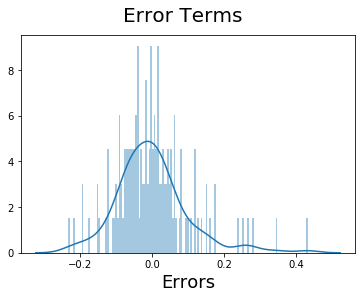

In [129]:
y_train_price = lr_m20.predict(X_train_m20_lr)
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 143)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)   

# Model Evaluation

In [140]:
y_test=df_test.pop('price')
X_test = df_test[['doornumber', 'enginelocation', 'fuelsystem', 'compressionratio','horsepower', 'peakrpm']]
X_test_fm = sm.add_constant(X_test)

In [145]:
y_pred = lr_m20.predict(X_test_fm)
y_pred.head()

160    0.057444
186    0.081211
59     0.124965
165    0.091150
140    0.041764
dtype: float64

Text(0, 0.5, 'y_test_pred')

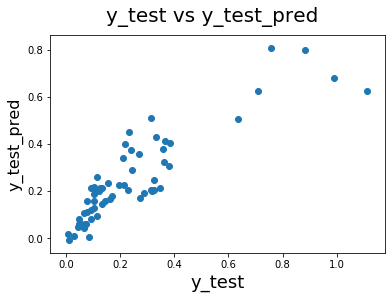

In [146]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16) 

# Assignment metric

In [147]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7739511793475132